<a href="https://colab.research.google.com/github/Clever-Lazinezz/NoteBook/blob/main/3225_Hospital_Readmittance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goals: Analyze medical data, determine which features contribute to readmittance and create a model which predicts readmittance within 30 days with a precision greater than a coin-toss.

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [ ]:
# https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008 - dataset + overview of features
# https://www.hindawi.com/journals/bmri/2014/781670/#introduction - paper + dataset w/ feature value mappings
# https://www.kaggle.com/code/iabhishekofficial/prediction-on-hospital-readmission
df = pd.read_csv('https://raw.githubusercontent.com/Clever-Lazinezz/ML-Data2/main/diabetic_data.csv')

In [ ]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/Clever-Lazinezz/ML-Data2/main/diabetic_data.csv')

### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
# Dropping max_glu_serum and A1Cresult due to high null count
df.drop(columns=['max_glu_serum', 'A1Cresult'], inplace=True)

In [ ]:
# Some patients have multiple encounters, BUT we will be keeping what some may say are "duplicates"
len(df['patient_nbr'].unique())

In [ ]:
df

In [ ]:
df['weight'].value_counts()

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

In [ ]:
# Dropping weight due to high unknown value count
df.drop(columns=['weight'], inplace=True)

In [ ]:
x = input("Return the slab..\n")


In [ ]:
answers = set(['Yes', 'yes', 'Y', 'y'])
def check_all_columns(df):
  for column in df.columns:
    try:
      print("Column: ", column)
      print(df[column].value_counts())
    except AttributeError:
          pass

    answer = input('Continue? ')
    if answer not in answers:
        break


In [ ]:
# Checking the value_counts() of each column
# check_all_columns(df)

In [ ]:
# To be removed: 'patient_nbr', 'encounter_id', 'discharge_disposition_id', 'admission_type_id', 'admission_source_id', 'acetohexamide', 'tolbutamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'
target_prediction_variable = ['readmitted']
# These are technically discrete, thus I will name them as such. However, for the point of this project, THESE are the CONTINUOUS VARIABLES
id_variables = ['patient_nbr', 'encounter_id']
discrete_variables = ['num_lab_procedures', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_oupatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
categorical_variables = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code',
                         'medical_specialty', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
                         'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                         'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
                         'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed',
                         'readmitted', 'diag_1', 'diag_2', 'diag_3']

Notes:


1.   Race: 2273 = ?
2.   Gender: 3 = Unknown/Invalid | 1506 = other | overwhelming majority caucasian
1.   Payer_Code: 40256 = ?2
1.   Need to be explained: 'number_oupatient', 'number_emergency', 'change', 'number_inpatient', 'diabetesMed',
1.   Metformin: 81778 = No
1.   Nateglinide: 101063 = No
2.   Repaglinide: 100227 = No
2.   Chlorpropamide: 10168 = No
1.   Glimepiride: 96575 = No
1.   Acetohexamide: 101765 = No
2.   Glipizide: 89080 = No
2.   Glyburide: 91916 = No
1.   Tolbutamide: 101743 = No
1.   Pioglitazone: 94438 = No
1.   Rosiglitazone: 95401 = No
2.   Acarbose: 101458 = No
2.   Miglitol: 101728 = No
2.   Troglitazone: 101763 = No
2.   Tolazamide: 101727 = No
2.   Examide: 101766 = No
1.   Citoglipton: 101766 = No
1.   Glyburide-metformin: 101060 = No
1.   Glipizide-metformin: 101753 = No
1.   Glimepiride-pioglitazone: 101765 = No
1.   Metformin-rosiglitazone: 101764 = No
1.   Metformin-pioglitazone: 101765 = No










In [ ]:
# Dropping id columns
df.drop(columns=['patient_nbr', 'encounter_id'], inplace=True)

In [ ]:
# Medicines NOT prescribed to over 80% of patients
medicines_not_prescribed_to_most = ['repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
                                    'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
                                    'troglitazone', 'tolazamide', 'examide', 'glyburide-metformin', 'citoglipton',
                                    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

In [ ]:
for x in medicines_not_prescribed_to_most:
  if x not in df.columns:
    print(x)

# Sitagliptin is in paper, but not this dataset...

In [ ]:
# Making our target 1 (readmitted within 30 days) and 0 (not readmitted within 30 days)
df['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [ ]:
# Preprocessing target since both groups need it
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

In [ ]:
# Heavily disproportionate number of 'readmitted' within 30 days
df['readmitted'].value_counts()

readmitted
0    90409
1    11357
Name: count, dtype: int64

In [ ]:
"""
Splitting data into two groups: group WITHOUT the medicines NOT prescribed to most patients (df) & group with all medicines
EXCEPT 'metformin' due to it having 80% OR LESS instances reporting 'no' (meaning "drug was not prescribed." (Strack 2014))
"""
medicine_group = df[medicines_not_prescribed_to_most+target_prediction_variable]

#### Medicine Group

##### EDA

In [ ]:
medicine_group

,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,...,troglitazone,tolazamide,examide,glyburide-metformin,citoglipton,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted
0,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,0
1,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,0
2,No,No,No,No,No,Steady,No,No,No,No,...,No,No,No,No,No,No,No,No,No,0
3,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,0
4,No,No,No,No,No,Steady,No,No,No,No,...,No,No,No,No,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,0
101762,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,0
101763,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,0
101764,No,No,No,No,No,Steady,No,No,Steady,No,...,No,No,No,No,No,No,No,No,No,0


##### Cleaning Up Data

In [ ]:
check_all_columns(medicine_group)

Column:  repaglinide
repaglinide
No        100227
Steady      1384
Up           110
Down          45
Name: count, dtype: int64
Continue? y
Column:  nateglinide
nateglinide
No        101063
Steady       668
Up            24
Down          11
Name: count, dtype: int64
Continue? y
Column:  chlorpropamide
chlorpropamide
No        101680
Steady        79
Up             6
Down           1
Name: count, dtype: int64
Continue? y
Column:  glimepiride
glimepiride
No        96575
Steady     4670
Up          327
Down        194
Name: count, dtype: int64
Continue? y
Column:  acetohexamide
acetohexamide
No        101765
Steady         1
Name: count, dtype: int64
Continue? yes
Column:  glipizide
glipizide
No        89080
Steady    11356
Up          770
Down        560
Name: count, dtype: int64
Continue? y
Column:  glyburide
glyburide
No        91116
Steady     9274
Up          812
Down        564
Name: count, dtype: int64
Continue? y
Column:  tolbutamide
tolbutamide
No        101743
Steady        23
Na

Less Than 50 People Prescribed: <br> acetohexamide <br> tolbutamide <br> miglitol <br> troglitazone <br> tolazamide <br> examide <br> citoglipton <br> glipizide-metformin <br> glimepiride-pioglitazone <br> metformin-rosiglitazone <br> metformin-pioglitazone <br>

In [ ]:
low_prescription_count = ['acetohexamide', 'tolbutamide', 'miglitol', 'troglitazone',
                          'tolazamide', 'examide', 'citoglipton', 'glipizide-metformin',
                          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

In [ ]:
# Dropping due to under 50 prescriptions
medicine_group.drop(columns=low_prescription_count, inplace=True)

<ipython-input-36-17df0b4e59d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medicine_group.drop(columns=low_prescription_count, inplace=True)


In [ ]:
medicine_group

,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,glyburide-metformin,readmitted
0,No,No,No,No,No,No,No,No,No,No,0
1,No,No,No,No,No,No,No,No,No,No,0
2,No,No,No,No,Steady,No,No,No,No,No,0
3,No,No,No,No,No,No,No,No,No,No,0
4,No,No,No,No,Steady,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...
101761,No,No,No,No,No,No,No,No,No,No,0
101762,No,No,No,No,No,No,No,No,No,No,0
101763,No,No,No,No,No,No,No,No,No,No,0
101764,No,No,No,No,Steady,No,Steady,No,No,No,0


In [ ]:
def convert_medicine_columns(df, exceptions=[None]):
    for column in df.columns:
        if column in exceptions:
            continue
        df[column] = df[column].apply(lambda x : 10 if x == 'Up'
                                                    else ( -10 if x == 'Down'
                                                    else ( 0 if x == 'Steady'
                                                    else  0)))

In [ ]:
convert_medicine_columns(medicine_group, ['readmitted'])

<ipython-input-37-30a87126afcb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x : 10 if x == 'Up'
<ipython-input-37-30a87126afcb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x : 10 if x == 'Up'
<ipython-input-37-30a87126afcb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
# Means aren't too far spread for medicines
medicine_group.describe().T

,count,mean,std,min,25%,50%,75%,max
repaglinide,101766.0,-19.691154,2.522231,-20.0,-20.0,-20.0,-20.0,10.0
nateglinide,101766.0,-19.860562,1.682046,-20.0,-20.0,-20.0,-20.0,10.0
chlorpropamide,101766.0,-19.982607,0.603542,-20.0,-20.0,-20.0,-20.0,10.0
glimepiride,101766.0,-18.966747,4.513423,-20.0,-20.0,-20.0,-20.0,10.0
glipizide,101766.0,-17.486194,6.758475,-20.0,-20.0,-20.0,-20.0,10.0
glyburide,101766.0,-17.882593,6.301161,-20.0,-20.0,-20.0,-20.0,10.0
pioglitazone,101766.0,-18.548435,5.243892,-20.0,-20.0,-20.0,-20.0,10.0
rosiglitazone,101766.0,-18.740149,4.904006,-20.0,-20.0,-20.0,-20.0,10.0
acarbose,101766.0,-19.938781,1.116769,-20.0,-20.0,-20.0,-20.0,10.0
glyburide-metformin,101766.0,-19.861054,1.666533,-20.0,-20.0,-20.0,-20.0,10.0


##### K-means Clustering

In [ ]:
from sklearn.cluster import KMeans

Goal: Discover data clusters and analyze how medicines directly relate to readmittance.

In [ ]:
# Empty list to store inertia values
inertia_values = []

# Try different values of k
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(medicine_group)
    inertia_values.append(kmeans.inertia_)

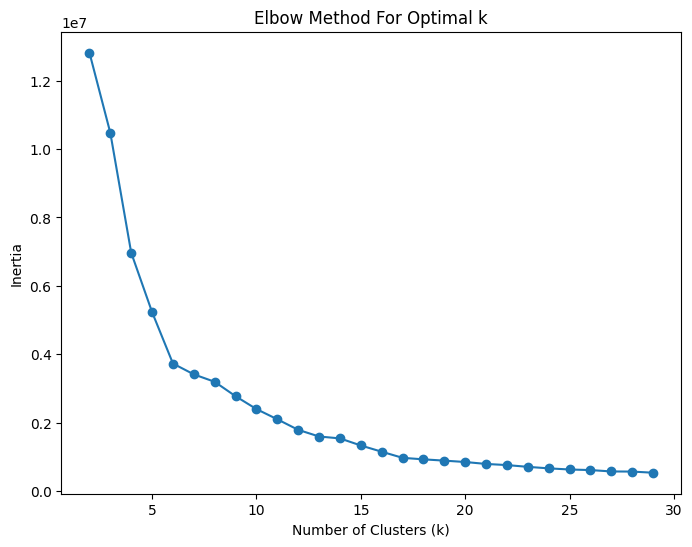

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 30), inertia_values, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=8, init='k-means++', n_init='auto', random_state=42)

In [ ]:
medicine_group['cluster'] = kmeans.fit_predict(medicine_group)

<ipython-input-50-98c07232165e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medicine_group['cluster'] = kmeans.fit_predict(medicine_group)


In [ ]:
medicine_group.groupby('cluster').count().T

cluster,0,1,2,3,4,5
repaglinide,770,70267,9236,4450,10006,7037
nateglinide,770,70267,9236,4450,10006,7037
chlorpropamide,770,70267,9236,4450,10006,7037
glimepiride,770,70267,9236,4450,10006,7037
glipizide,770,70267,9236,4450,10006,7037
glyburide,770,70267,9236,4450,10006,7037
pioglitazone,770,70267,9236,4450,10006,7037
rosiglitazone,770,70267,9236,4450,10006,7037
acarbose,770,70267,9236,4450,10006,7037
glyburide-metformin,770,70267,9236,4450,10006,7037


In [ ]:
medicine_group.groupby('cluster').mean().T

cluster,0,1,2,3,4,5
repaglinide,-19.815345,-19.671370,-19.531139,-19.870475,-19.778431,-19.458216
nateglinide,-19.943680,-19.865062,-19.706427,-19.962360,-19.796518,-19.667774
chlorpropamide,-19.998153,-19.975958,-19.997150,-19.995572,-20.000000,-19.977000
glimepiride,-19.988921,-19.978362,-18.378224,-19.985608,0.734795,-19.905443
glipizide,0.702613,-19.934184,-16.541257,-19.966788,-19.622428,-19.752108
glyburide,-19.690703,-19.933282,-17.534559,0.884534,-19.803301,-19.777664
pioglitazone,-19.841197,-19.991134,0.324925,-19.854976,-19.785214,-19.864554
rosiglitazone,-18.086049,-19.992336,-19.957247,-18.151223,-17.700656,0.393560
acarbose,-19.866125,-19.967092,-19.880291,-19.913650,-19.839475,-19.933555
glyburide-metformin,-19.988921,-19.853942,-19.677925,-19.913650,-19.945738,-19.739330


In [ ]:
# Closer look at proportion of readmitted under 30 days in each cluster
medicine_group.groupby('cluster')['readmitted'].apply(lambda x: (x == 1).sum() / x.count()).T

cluster
0    0.128571
1    0.113198
2    0.107308
3    0.104817
4    0.113988
5    0.104615
Name: readmitted, dtype: float64

In [ ]:
non_dominant_medicines = ['acarbose', 'glyburide-metformin', 'chlorpropamide',
                          'nateglinide', 'repaglinide']
dominant_medicines = [column for column in medicine_group.columns if column not in non_dominant_medicines]

In [ ]:
check_all_columns(medicine_group[non_dominant_medicines])

Column:  acarbose
acarbose
-20    101458
 0        295
 10        10
-10         3
Name: count, dtype: int64
Continue? y
Column:  glyburide-metformin
glyburide-metformin
-20    101060
 0        692
 10         8
-10         6
Name: count, dtype: int64
Continue? y
Column:  chlorpropamide
chlorpropamide
-20    101680
 0         79
 10         6
-10         1
Name: count, dtype: int64
Continue? y
Column:  nateglinide
nateglinide
-20    101063
 0        668
 10        24
-10        11
Name: count, dtype: int64
Continue? y
Column:  repaglinide
repaglinide
-20    100227
 0       1384
 10       110
-10        45
Name: count, dtype: int64
Continue? y


In [ ]:
check_all_columns(medicine_group[dominant_medicines])

Column:  glimepiride
glimepiride
-20    96575
 0      4670
 10      327
-10      194
Name: count, dtype: int64
Continue? y
Column:  glipizide
glipizide
-20    89080
 0     11356
 10      770
-10      560
Name: count, dtype: int64
Continue? y
Column:  glyburide
glyburide
-20    91116
 0      9274
 10      812
-10      564
Name: count, dtype: int64
Continue? y
Column:  pioglitazone
pioglitazone
-20    94438
 0      6976
 10      234
-10      118
Name: count, dtype: int64
Continue? y
Column:  rosiglitazone
rosiglitazone
-20    95401
 0      6100
 10      178
-10       87
Name: count, dtype: int64
Continue? y
Column:  readmitted
readmitted
0    90409
1    11357
Name: count, dtype: int64
Continue? y
Column:  cluster
cluster
1    66547
4    10159
2     9086
5     8125
3     7079
0      770
Name: count, dtype: int64
Continue? y


#### Continued

In [ ]:
# Dropping 23 "...features of medicine" (Table 1, Strack 2014) columns with over 80% of instances reporting 'no' (meaning "...drug was not prescribed." (Strack 2014))
df.drop(columns=medicines_not_prescribed_to_most, inplace=True)

In [ ]:
# Checkpoint: should only be 24 columns
print("Number of Columns: ", len(df.columns))
print(df.columns)

Number of Columns:  24
Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'insulin', 'change', 'diabetesMed',
       'readmitted'],
      dtype='object')


### Cleaning up Data

In [ ]:
# Needs Encoding: ['admission_type_id', 'discharge_disposition_id'] - done
# One-Hot Encoding: []
# Ordinal Encoding: ['age', 'metformin', 'insulin'] - done
# Label Encoding: ['gender', 'change', 'diabetesMed'] - done
# Getting dropped: ['payer_code', 'race', 'medical_specialty'] - done
#check_all_columns(df)

In [ ]:
# Dropping:
# 'payer_code' - insurance/self-pay info
# 'race' - not studying effects of race in this anlysis
# 'medical_specialty' - high null count + low interpretability
df.drop(columns=['payer_code', 'race', 'medical_specialty'], inplace=True)

In [ ]:
# Getting rid of rows with '?' gender & label encoding
df = df[df['gender'] != 'Unknown/Invalid']
print(df['gender'].value_counts())
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
# Alternate to avoid warning
# df.loc[:, 'gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
print(df['gender'].value_counts())

gender
Female    54708
Male      47055
Name: count, dtype: int64
gender
0    54708
1    47055
Name: count, dtype: int64


<ipython-input-64-2a860962d4f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)


In [ ]:
# Label encoding 'change'
print(df['change'].value_counts())
df.loc[:, 'change'] = df['change'].apply(lambda x: 1 if x == 'Ch' else 0)
print(df['change'].value_counts())

change
No    54754
Ch    47009
Name: count, dtype: int64
change
0    54754
1    47009
Name: count, dtype: int64


In [ ]:
print(df['age'].value_counts())

age
[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64


In [ ]:
# Ordinal Encoding: changing age ranges to the median number in the range
replaceDict = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25,
'[30-40)' : 35,
'[40-50)' : 45,
'[50-60)' : 55,
'[60-70)' : 65,
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

df.loc[:, 'age'] = df['age'].apply(lambda x : replaceDict[x])
print(df['age'].value_counts())

age
75    26066
65    22482
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: count, dtype: int64


In [ ]:
df['metformin'].value_counts()

metformin
No        81776
Steady    18345
Up         1067
Down        575
Name: count, dtype: int64

In [ ]:
# Ordinal Encoding:
df.loc[:, 'metformin'] = df['metformin'].apply(lambda x : 10 if x == 'Up'
                                            else ( -10 if x == 'Down'
                                            else ( 0 if x == 'Steady'
                                            else  -20)))
df['metformin'].value_counts()

metformin
-20    81776
0      18345
10      1067
-10      575
Name: count, dtype: int64

In [ ]:
df['insulin'].value_counts()

insulin
No        47380
Steady    30849
Down      12218
Up        11316
Name: count, dtype: int64

In [ ]:
# Ordinal Encoding:
df['insulin'] = df['insulin'].apply(lambda x : 10 if x == 'Up'
                                            else ( -10 if x == 'Down'
                                            else ( 0 if x == 'Steady'
                                            else  -20)))
df['insulin'].value_counts()

insulin
-20    47380
 0     30849
-10    12218
 10    11316
Name: count, dtype: int64

In [ ]:
df['admission_type_id'].value_counts()

admission_type_id
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

In [ ]:
# Label encoding 'diabetesMed'
print(df['diabetesMed'].value_counts())
df.loc[:, 'diabetesMed'] = df['diabetesMed'].apply(lambda x: 1 if x == 'Yes' else 0)
print(df['diabetesMed'].value_counts())

diabetesMed
Yes    78361
No     23402
Name: count, dtype: int64
diabetesMed
1    78361
0    23402
Name: count, dtype: int64


In [ ]:
# Needs Encoding: ['medical_specialty']
df['discharge_disposition_id'].value_counts()

discharge_disposition_id
1     60232
3     13954
6     12902
18     3691
2      2128
22     1992
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

In [ ]:
# List of discharge_disposition_id values that mean patient died
discharge_ids_to_exclude = [11, 13, 14, 19, 20, 21]
print(len(df))

# Filtering out rows where discharge_disposition_id is not in the exclusion list
df = df[~df['discharge_disposition_id'].isin(discharge_ids_to_exclude)]
print(len(df))

101763
99340


In [ ]:
df['discharge_disposition_id'].value_counts()

discharge_disposition_id
1     60232
3     13954
6     12902
18     3691
2      2128
22     1992
5      1184
25      989
4       815
7       623
23      412
28      139
8       108
15       63
24       48
9        21
17       14
16       11
10        6
27        5
12        3
Name: count, dtype: int64

In [ ]:
def complex_replace_func(x):
    #print(x)
    if x in [1]: # Home
        return 1
    else: # Other
        return 0

In [ ]:
# Collapsing + label Encoding
df.loc[:, 'discharge_disposition_id'] = df['discharge_disposition_id'].apply(lambda x: complex_replace_func(x))
df['discharge_disposition_id'].value_counts()

discharge_disposition_id
1    60232
0    39108
Name: count, dtype: int64

In [ ]:
df['admission_type_id'].value_counts()

admission_type_id
1    52369
3    18667
2    18132
6     5207
5     4617
8      320
7       18
4       10
Name: count, dtype: int64

In [ ]:
# Collapsing'admission_type_id'
# Justification: 8 = Not mapped & 6 = NULL | 2 = Urgent & 7 = Trauma Center
df['admission_type_id'] = df['admission_type_id'].replace({2: 1, 7: 1, 6: 5, 8: 5})
df['admission_type_id'].value_counts()

<ipython-input-80-8ead0fec5da4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['admission_type_id'] = df['admission_type_id'].replace({2: 1, 7: 1, 6: 5, 8: 5})


admission_type_id
1    70519
3    18667
5    10144
4       10
Name: count, dtype: int64

In [ ]:
df['admission_source_id'].value_counts()

admission_source_id
7     55848
1     29167
17     6570
4      3118
6      2239
2      1081
5       806
3       185
20      159
9       125
8        15
22       12
10        8
14        2
11        2
25        2
13        1
Name: count, dtype: int64

In [ ]:
# Expcect 'others' = [4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
def complex_replace_func(x):
    if x in [1, 2, 3]: # Physican Referal
        return 1
    elif x in [7]:
        return 2 # Emergency Room
    else: # Other
        return 0

In [ ]:
# Ordinal Encoding:
df.loc[:, 'admission_source_id'] = df['admission_source_id'].apply(lambda x: complex_replace_func(x))
df['admission_source_id'].value_counts()

admission_source_id
2    55848
1    30433
0    13059
Name: count, dtype: int64

In [ ]:
df.head().T

,0,1,2,3,4
gender,0,0,0,1,1
age,5,15,25,35,45
admission_type_id,5,1,1,1,1
discharge_disposition_id,0,1,1,1,1
admission_source_id,1,2,2,2,2
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8
number_outpatient,0,0,2,0,0


In [ ]:
# Each columns has over 700 unique values!
complex_columns = ['diag_1', 'diag_2', 'diag_3']
complex_columns_df = df.loc[:, complex_columns]
#check_all_columns(complex_columns_df)

In [ ]:
# Converting all diagnosis codes into major groups as defined by Table 2 (Strack 2014)
for column in complex_columns:
    # Will set all non-convertibles Nan
    complex_columns_df[column] = pd.to_numeric(complex_columns_df[column], errors='coerce')
for column in complex_columns:
    complex_columns_df["temp_diag"] = np.nan
    complex_columns_df.loc[(complex_columns_df[column]>=390) & (complex_columns_df[column]<=459) | (complex_columns_df[column]==785), "temp_diag"] = "Circulatory"
    complex_columns_df.loc[(complex_columns_df[column]>=460) & (complex_columns_df[column]<=519) | (complex_columns_df[column]==786), "temp_diag"] = "Respiratory"
    complex_columns_df.loc[(complex_columns_df[column]>=520) & (complex_columns_df[column]<=579) | (complex_columns_df[column]==787), "temp_diag"] = "Digestive"
    complex_columns_df.loc[(complex_columns_df[column]>=250) & (complex_columns_df[column]<251), "temp_diag"] = "Diabetes"
    complex_columns_df.loc[(complex_columns_df[column]>=800) & (complex_columns_df[column]<=999), "temp_diag"] = "Injury"
    complex_columns_df.loc[(complex_columns_df[column]>=710) & (complex_columns_df[column]<=739), "temp_diag"] = "Muscoloskeletal"
    complex_columns_df.loc[(complex_columns_df[column]>=580) & (complex_columns_df[column]<=629) | (complex_columns_df[column] == 788), "temp_diag"] = "Genitourinary"
    complex_columns_df.loc[(complex_columns_df[column]>=140) & (complex_columns_df[column]<=239), "temp_diag"] = "Neoplasms"

    complex_columns_df["temp_diag"] = complex_columns_df["temp_diag"].fillna("Other")
    complex_columns_df[column] = complex_columns_df["temp_diag"]
    complex_columns_df = complex_columns_df.drop(columns=["temp_diag"], axis=1)


In [ ]:
#check_all_columns(complex_columns_df)

In [ ]:
# Making sure lengths match for upcoming merger
print(len(complex_columns_df))
print(len(df))

99340
99340


In [ ]:
# Replacing unprocessed columns with processed columns
for column in complex_columns:
    df[column] = complex_columns_df[column]

In [ ]:
# One-hot encoding complex_columns
for column in complex_columns:
    one_hot_encoded = pd.get_dummies(df[column])
    one_hot_encoded = one_hot_encoded.applymap(lambda x: int(x))
    df = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
df.head().T

,0,1,2,3,4
gender,0,0,0,1,1
age,5,15,25,35,45
admission_type_id,5,1,1,1,1
discharge_disposition_id,0,1,1,1,1
admission_source_id,1,2,2,2,2
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8
number_outpatient,0,0,2,0,0


In [ ]:
df.drop(columns=['diag_1', 'diag_2', 'diag_3'], inplace=True)

In [ ]:
df.head().T

,0,1,2,3,4
gender,0,0,0,1,1
age,5,15,25,35,45
admission_type_id,5,1,1,1,1
discharge_disposition_id,0,1,1,1,1
admission_source_id,1,2,2,2,2
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8
number_outpatient,0,0,2,0,0


### Data Visulaization

In [ ]:
df.head()

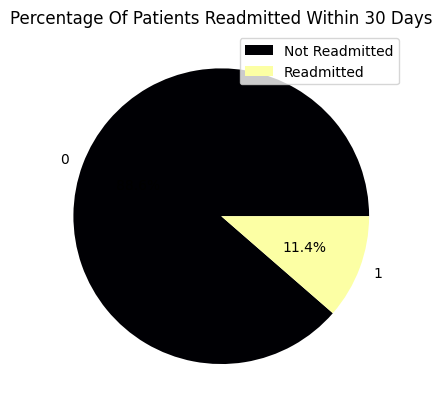

In [ ]:
# I like how the graph looks, and it looks like pacman. I know that numerous people would advise me to change the colors...
# Conclusion: There are signifcantly more 'not readmitted' cases than 'readmitted (about 10:1).
counts = df['readmitted'].value_counts()
percentages = counts * 100 / len(df)

fig, ax = plt.subplots()
percentages.plot(kind='pie', ax=ax, autopct='%1.1f%%', title='Percentage Of Patients Readmitted Within 30 Days', ylabel='', colormap='inferno')
ax.legend(["Not Readmitted", "Readmitted"]);
plt.show()

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

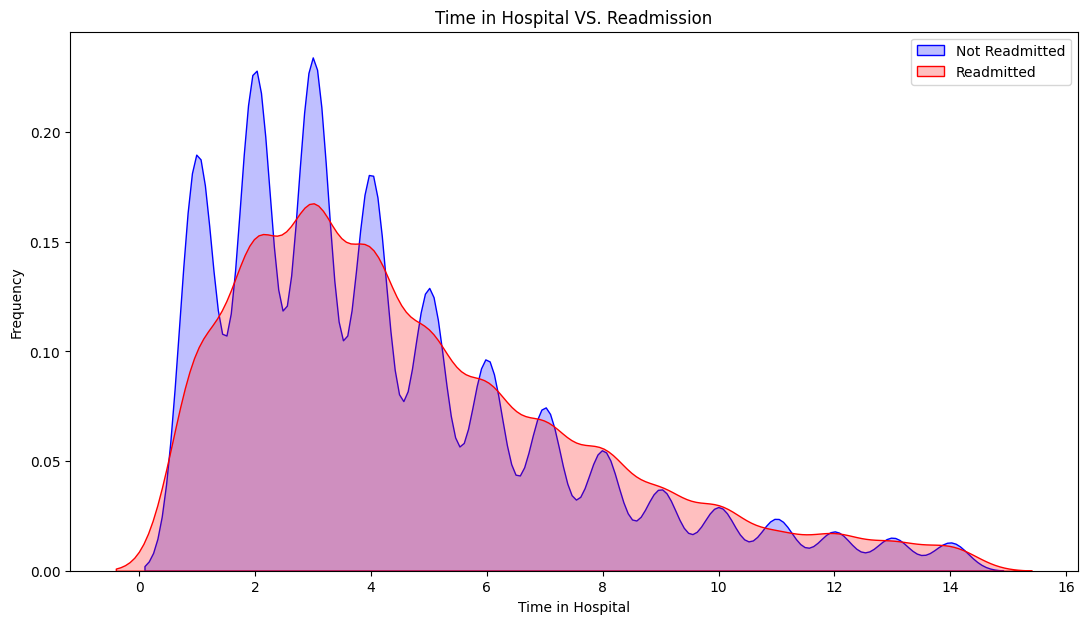

In [ ]:
# Conclusion: Those in the hospital less than 6 days, have a significantly lower chance of readmittance.
# After 6 days, time_in_hospital doesn't have a large effect on readmittance rates.
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',fill=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',fill=True, label='Readmitted')
ax.legend(['Not Readmitted', 'Readmitted'])
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

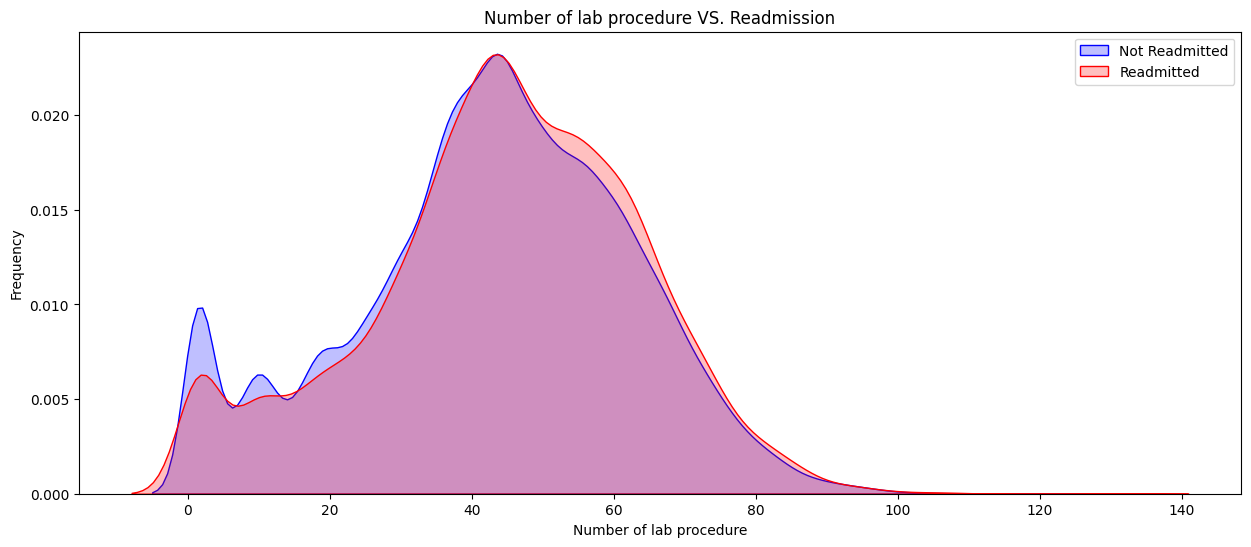

In [ ]:
# Conclusion: Patients with less than 5 lab procedures have a slightly lower chance of being readmitted.
# Overall, number of procedures has miniscule affect on readmittance.
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',fill=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',fill=True, label='readmitted')
ax.legend(['Not Readmitted', 'Readmitted'])
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

##### Before Proprocessing

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


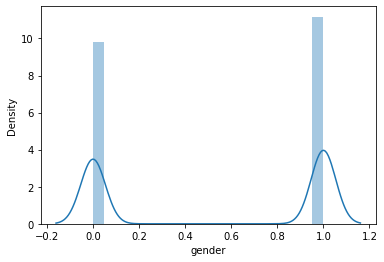

In [ ]:
# Checking to see if there is an overwhelming majority of either gender
sns.distplot(df['gender'])

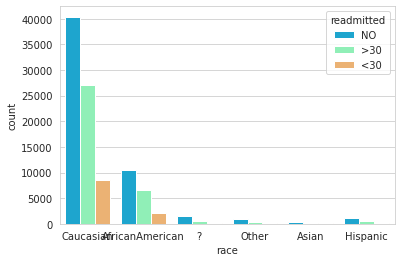

In [ ]:
# Most of the data is of Caucasians
# African Americans and Caucasians have a similar readmittance pattern
sns.set_style('whitegrid')
sns.countplot(x='race', hue='readmitted', data=raw_df, palette='rainbow')

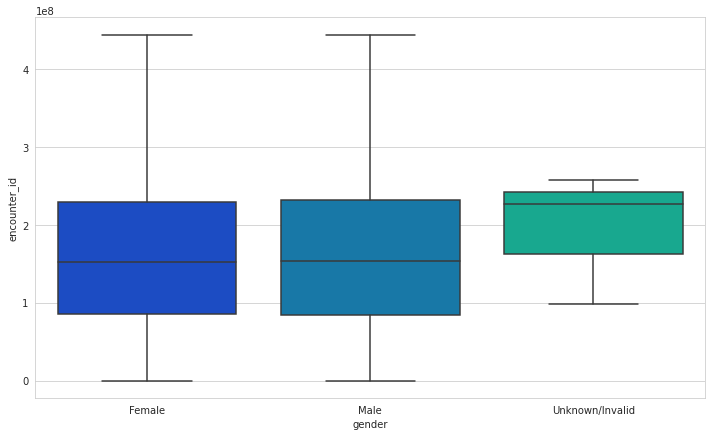

In [ ]:
# Checking for the relations between encounter id and gender
# Both genders seem to have insignificant fluctuations in encount id classification
plt.figure(figsize=(12,7))
sns.boxplot(x='gender', y='encounter_id', data=df, palette='winter')

### Statistical Test

#### Correlation Coefficient

Question: Is there a statistically significant relationship between any variables? <br> Conclusion: There are no signs of our variables having very strong relationships

In [ ]:
corr_df = df[[
    'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'metformin', 'insulin', 'change', 'diabetesMed', 'readmitted'
]]

<Axes: >

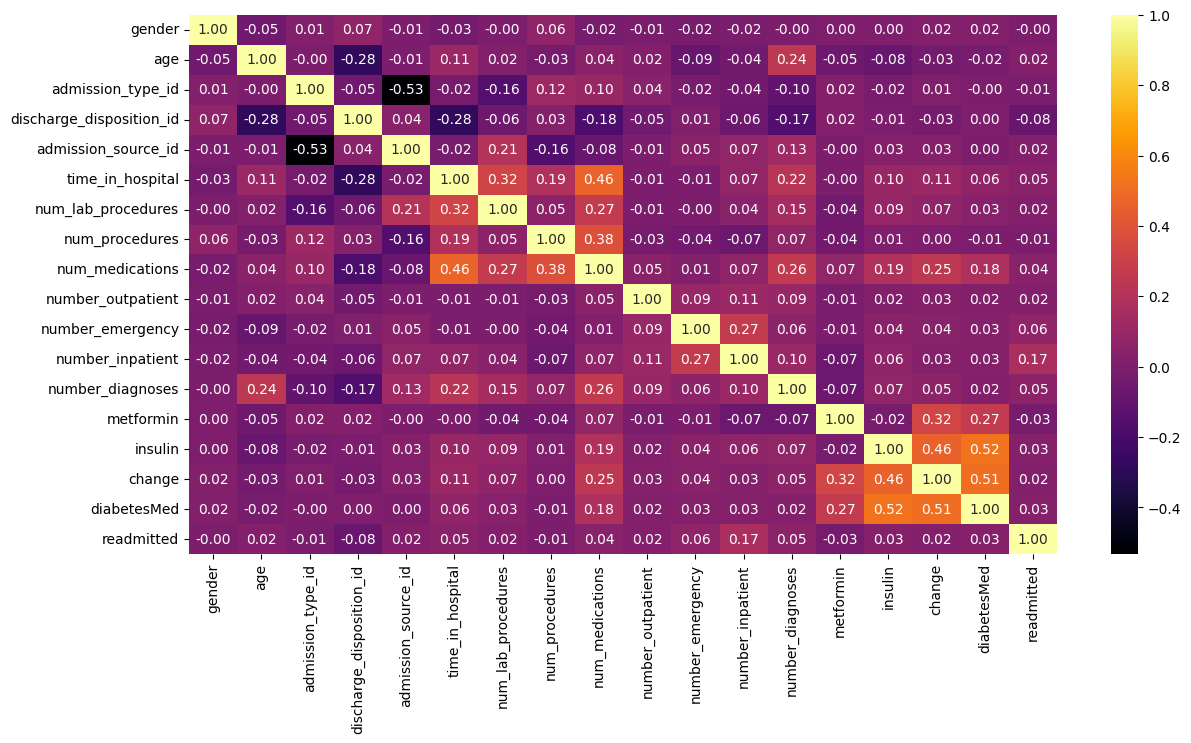

In [ ]:
# Conclusion: There are no signs of our variables having very strong relationships
# Note: num_medications & time_in_hospital have some relationship - continuous variables
# Note: admission_type_id & admission_source_id have some relationship
# Note: insulin & diabetesMed have some relationship
plt.figure(figsize=(14,7))
sns.heatmap(data=corr_df.corr(), annot=True, cmap='inferno', fmt=".2f")

In [ ]:
# Non-parametric test - using to support above cell's correlation heatmap
plt.figure(figsize=(14,7))
sns.heatmap(data=corr_df.corr(method='kendall'), annot=True, cmap='inferno', fmt=".2f")

#### One-Way Anova

Question: Does the mean time_in_hospital significantly vary across any admission_types?

Conclusion: p-value is much smaller than significance level of 0.05, we reject the null hypothesis. This suggests that there is strong evidence to conclude that at least one of the means of time in hospital across different admission types is significantly different from the others.

In [ ]:
#import statsmodels.api as sm
#from statsmodels.formula.api import ols
import scipy.stats as stats

In [ ]:
df['admission_type_id'].value_counts()

admission_type_id
1    70519
3    18667
5    10144
4       10
Name: count, dtype: int64

In [ ]:
# Filter the data for each admission type
admission_type_1 = df[df['admission_type_id'] == 1]['time_in_hospital']
admission_type_3 = df[df['admission_type_id'] == 3]['time_in_hospital']
admission_type_5 = df[df['admission_type_id'] == 5]['time_in_hospital']
admission_type_4 = df[df['admission_type_id'] == 4]['time_in_hospital']

# Perform ANOVA test
anova_result = stats.f_oneway(admission_type_1, admission_type_3, admission_type_5, admission_type_4)
# Add more groups as needed

# Print ANOVA result
print("ANOVA F-Statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

ANOVA F-Statistic: 18.91037830279554
ANOVA p-value: 2.9559655671143534e-12


#### Tukey's HSD

Question: Which 'admission_types' have statistically significant mean differences?

Conclusion: The mean difference between Admission Type 1 and Admission Type 3 is -0.1175, and the p-value is very small (p < 0.05), indicating a significant difference between these groups.
<br>
Similarly, there's a significant difference between Admission Type 1 and Admission Type 5, as well as between Admission Type 3 and Admission Type 5.
<br>
However, there's no significant difference between Admission Type 1 and Admission Type 4, Admission Type 3 and Admission Type 4, and Admission Type 4 and Admission Type 5.

In [ ]:
import statsmodels.stats.multicomp as mc

# Combine all time_in_hospital data and corresponding admission types into a single array and group labels
data = [admission_type_1, admission_type_3, admission_type_5, admission_type_4]
group_labels = ['Admission Type 1', 'Admission Type 3', 'Admission Type 5', 'Admission Type 4']  # Labels for groups

# Perform Tukey's HSD test
tukey_result = mc.MultiComparison(np.concatenate(data), np.concatenate([[label]*len(data[i]) for i, label in enumerate(group_labels)]))
tukey_table = tukey_result.tukeyhsd()

# Print Tukey's HSD results
print(tukey_table)


          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
Admission Type 1 Admission Type 3  -0.1175    0.0 -0.1802 -0.0547   True
Admission Type 1 Admission Type 4   -1.222 0.5615 -3.6331   1.189  False
Admission Type 1 Admission Type 5  -0.2005    0.0 -0.2815 -0.1196   True
Admission Type 3 Admission Type 4  -1.1045 0.6416 -3.5161   1.307  False
Admission Type 3 Admission Type 5   -0.083 0.1055 -0.1771   0.011  False
Admission Type 4 Admission Type 5   1.0215 0.6969 -1.3906  3.4336  False
------------------------------------------------------------------------


#### Admission Type \ Time In Hospital

In [ ]:
df.groupby('admission_type_id')['time_in_hospital'].mean().T

admission_type_id
1    4.422042
3    4.304548
4    3.200000
5    4.221510
Name: time_in_hospital, dtype: float64

### ML Models

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df.tail()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,Respiratory,Circulatory,Diabetes,Digestive,Genitourinary,Injury,Muscoloskeletal,Neoplasms,Other,Respiratory
101761,1,75,1,0,2,3,51,0,16,0,...,0,1,0,0,0,0,0,0,0,0
101762,0,85,1,0,0,5,33,3,18,0,...,0,0,0,1,0,0,0,0,0,0
101763,1,75,1,1,2,1,53,0,9,1,...,0,0,0,0,0,0,0,0,1,0
101764,0,85,1,0,2,10,45,2,21,0,...,0,0,0,0,0,1,0,0,0,0
101765,1,75,1,1,2,6,13,3,3,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X = df.drop(columns=['readmitted'], axis=1)
y = df['readmitted']

In [ ]:
# 60% of data for training models
X_train, X_pool, y_train, y_pool = train_test_split(X, y, test_size = 0.40, random_state = 42)

In [ ]:
# 15% of data for validation
# 25% of data for testing
X_val, X_test, y_val, y_test = train_test_split(X_pool, y_pool, test_size = 0.625, random_state = 42)

#### Decision Tree - Supervised - done

Goal: Find which features the model determined as "important."

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     22076
           1       0.14      0.17      0.16      2759

    accuracy                           0.79     24835
   macro avg       0.52      0.52      0.52     24835
weighted avg       0.81      0.79      0.80     24835



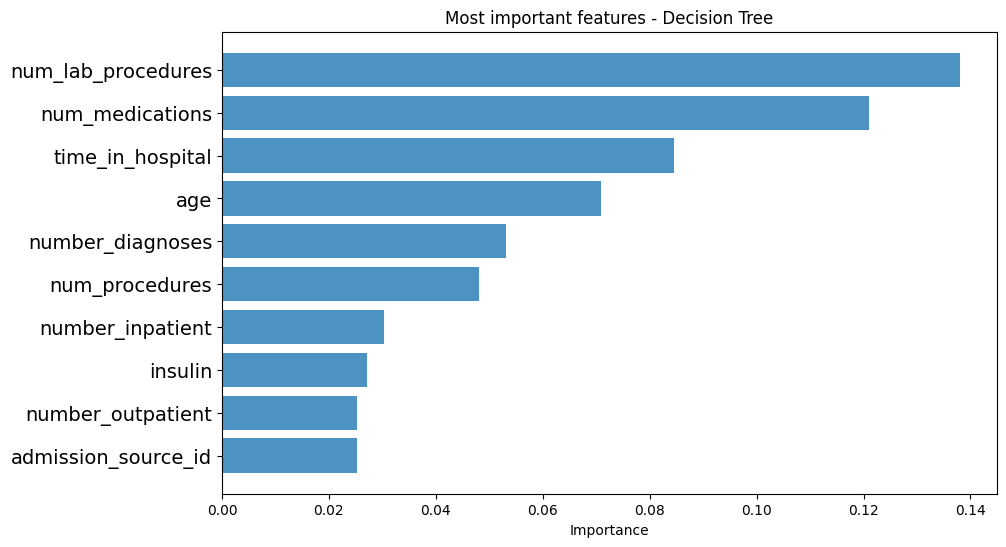

In [ ]:
# Most important features according to the Decision Tree Model
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

#### Random Forest - Supervised

Goal: Create an effective model which predicts readmittance with a precision over 0.60.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

# Initialize the classifier
rfc = RandomForestClassifier(random_state=42)

# Set up the grid search
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the results
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(max_features='auto', random_state=42)


In [ ]:
rfc = RandomForestClassifier(random_state=41)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=41)

In [ ]:
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     22076
           1       0.64      0.01      0.02      2759

    accuracy                           0.89     24835
   macro avg       0.77      0.50      0.48     24835
weighted avg       0.86      0.89      0.84     24835



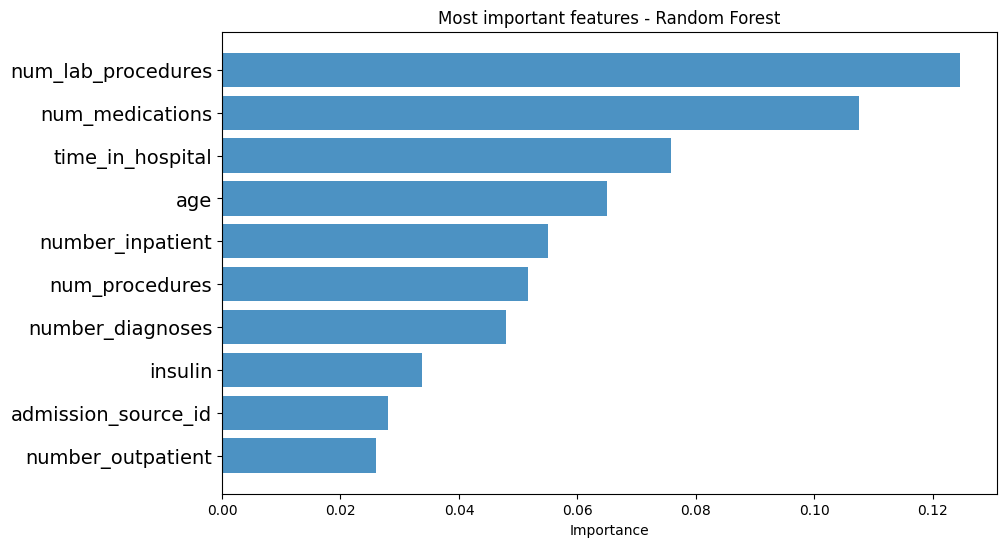

In [ ]:
# Most important features according to the Random Forest Model
feature_names = X_train.columns
feature_imports = rfc.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()


#### KNN - Unsupervised

Goal: Discover natural clusters of data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

##### Grid Search

Best parameters: {'metric': 'manhattan', 'n_neighbors': 9}. I found that 8 (I know ties are a concern, but yolo) is better than 9.

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'metric': 'manhattan', 'n_neighbors': 9}


##### K = 8

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     22076
           1       0.33      0.01      0.01      2759

    accuracy                           0.89     24835
   macro avg       0.61      0.50      0.48     24835
weighted avg       0.83      0.89      0.84     24835

[[22039    37]
 [ 2741    18]]


##### K = 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     22076
           1       0.21      0.03      0.05      2759

    accuracy                           0.88     24835
   macro avg       0.55      0.51      0.49     24835
weighted avg       0.81      0.88      0.84     24835

[[21768   308]
 [ 2678    81]]


##### K = 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93     22076
           1       0.15      0.05      0.08      2759

    accuracy                           0.86     24835
   macro avg       0.52      0.51      0.50     24835
weighted avg       0.81      0.86      0.83     24835

[[21249   827]
 [ 2617   142]]


#### Validation Trial

In [ ]:
predictions = rfc.predict(X_val)
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     13193
           1       0.71      0.01      0.01      1708

    accuracy                           0.89     14901
   macro avg       0.80      0.50      0.48     14901
weighted avg       0.87      0.89      0.83     14901



## Conclusion